In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import numpy as np

In [2]:
os.getcwd()

'C:\\Users\\User\\Downloads\\Intel Image Classification'

In [3]:
os.listdir('seg_test')

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [4]:
def len_data(filename):
    buildings_data = os.listdir(filename+'/buildings')
    forest_data = os.listdir(filename+'/forest')
    glacier_data = os.listdir(filename+'/glacier')
    mountain_data = os.listdir(filename+'/mountain')
    sea_data = os.listdir(filename+'/sea')
    street_data = os.listdir(filename+'/street')

    value = []
    for data in [buildings_data,forest_data,glacier_data,mountain_data,sea_data,street_data]:
        value.append(len(data))
        
    return sum(value)

In [5]:
filename = r'C:\Users\User\Downloads\Intel Image Classification/seg_train'
print('Total Images in Training set : ' + str(len_data(filename)))

Total Images in Training set : 14034


In [6]:
filename = r'C:\Users\User\Downloads\Intel Image Classification/seg_test'
print('Total Images in Testing set : ' + str(len_data(filename)))

Total Images in Testing set : 3000


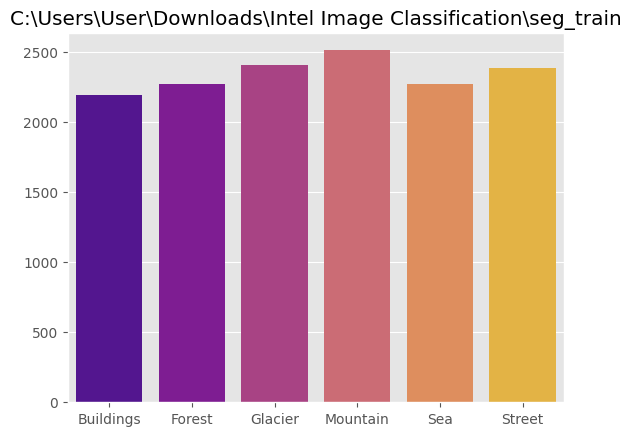

In [7]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(filename):
    buildings_data = os.listdir(os.path.join(filename, 'buildings'))
    forest_data = os.listdir(os.path.join(filename, 'forest'))
    glacier_data = os.listdir(os.path.join(filename, 'glacier'))
    mountain_data = os.listdir(os.path.join(filename, 'mountain'))
    sea_data = os.listdir(os.path.join(filename, 'sea'))
    street_data = os.listdir(os.path.join(filename, 'street'))

    value = []
    for data in [buildings_data, forest_data, glacier_data, mountain_data, sea_data, street_data]:
        value.append(len(data))
    
    sns.barplot(x=['Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street'], y=value, palette='plasma')
    plt.title(filename.split('/')[-1])

filename = r'C:\Users\User\Downloads\Intel Image Classification\seg_train'
plot_data(filename)


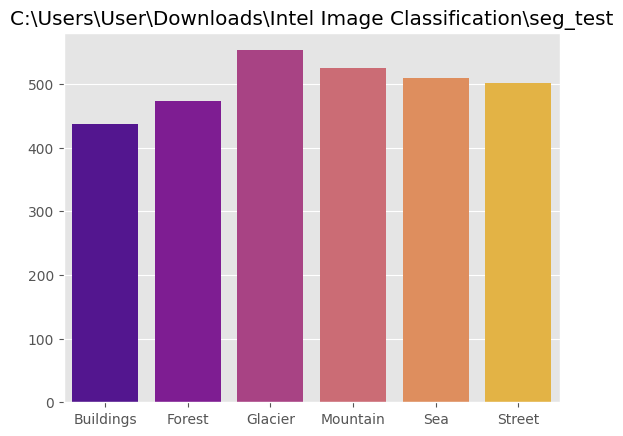

In [8]:
filename = r'C:\Users\User\Downloads\Intel Image Classification\seg_test'
plot_data(filename)

Sample Images from Training set

In [9]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    
    folder1 = folder + '\\buildings'
    for filename in os.listdir(folder1)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder1,filename))
        if img is not None:
            images.append(img)
            
    folder2 = folder + '\\forest'
    for filename in os.listdir(folder2)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder2,filename))
        if img is not None:
            images.append(img)
    
    folder3 = folder + '\\glacier'
    for filename in os.listdir(folder3)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder3,filename))
        if img is not None:
            images.append(img)
    folder4 = folder + '\\mountain'
    for filename in os.listdir(folder4)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder4,filename))
        if img is not None:
            images.append(img)
            
    folder5 = folder + '\\sea'
    for filename in os.listdir(folder5)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder5,filename))
        if img is not None:
            images.append(img)
    
    folder6 = folder + '\\street'
    for filename in os.listdir(folder6)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder6,filename))
        if img is not None:
            images.append(img)
    return images

In [10]:
images = load_images_from_folder(r'C:\Users\User\Downloads\Intel Image Classification\seg_train')

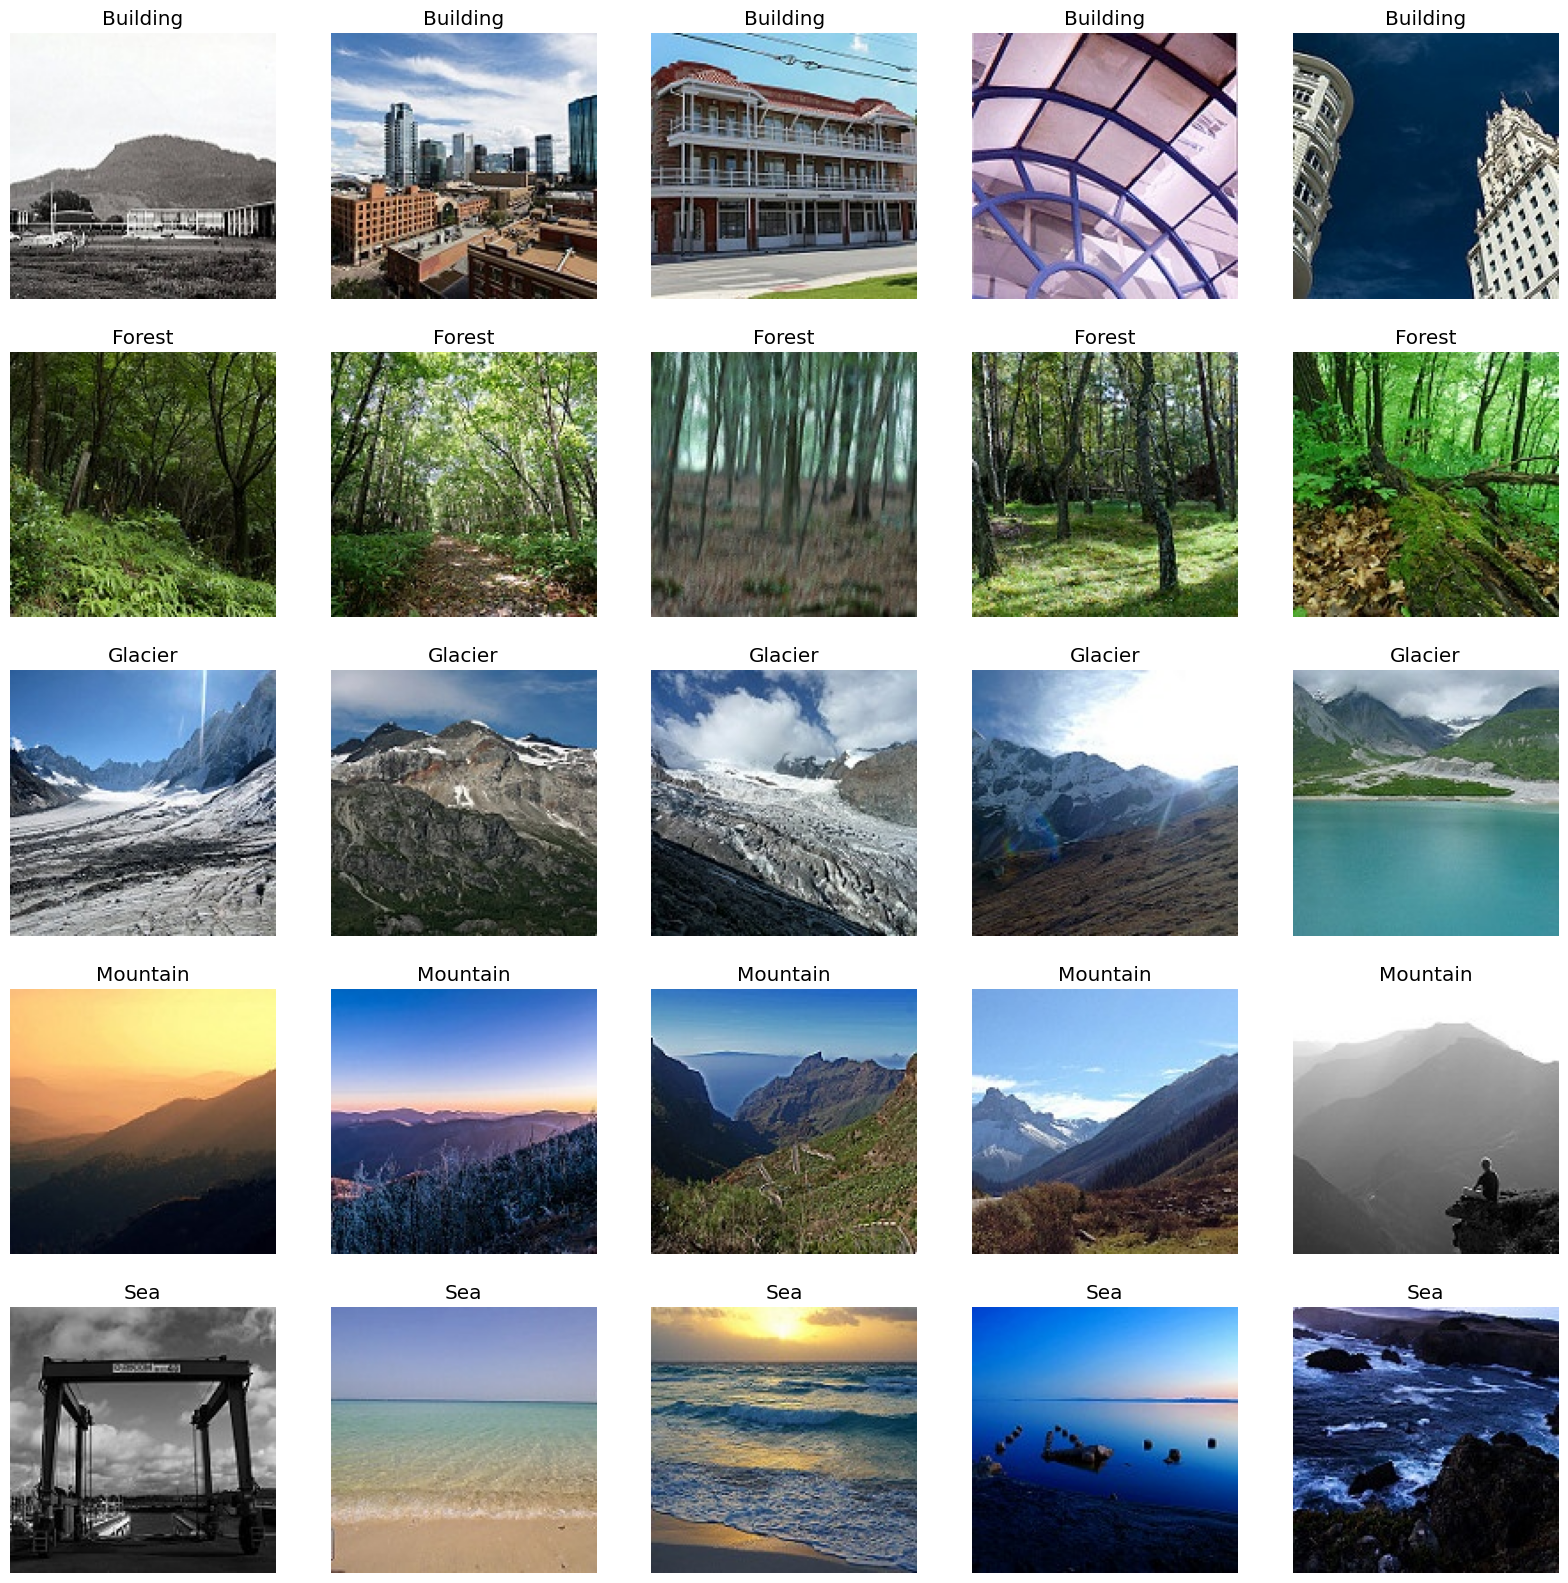

In [11]:
fig, axis = plt.subplots(5,5,figsize=(20,20))
count = 0
for i in range(0,5):
    for j in range(0,5):
        img_rgb = cv2.cvtColor(images[count], cv2.COLOR_BGR2RGB)
        axis[i,j].imshow(img_rgb)
        axis[i,j].axis('off')
        count = count + 1
        if i==0:
            axis[i,j].set_title('Building')
        elif i==1:
            axis[i,j].set_title('Forest')
        elif i==2:
            axis[i,j].set_title('Glacier')
        elif i==3:
            axis[i,j].set_title('Mountain')
        elif i==4:
            axis[i,j].set_title('Sea')
        else:
            axis[i,j].set_title('Street')

In [44]:
import matplotlib.pyplot as plt
import plotly.express as px
label_counts = {
    'buildings': 2191,
    'forest': 2271,
    'glacier': 2404,
    'mountain': 2512,
    'sea': 2274,
    'street': 2382
}


# Create a Pie chart using Plotly
fig = px.pie(values=list(label_counts.values()), names=list(label_counts.keys()), title='Label Distribution ')

fig.update_traces(textposition='inside', textinfo='percent+label+value', hole=0.5)

fig.show()

FIRST MODEL ( With Image Augmentation )

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [14]:
TRAINING_DIR = r'C:\Users\User\Downloads\Intel Image Classification\seg_train'
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 14034 images belonging to 6 classes.


In [15]:
# No need to augment validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255
    )

In [16]:
VALIDATION_DIR = r'C:\Users\User\Downloads\Intel Image Classification\seg_test'
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))

Found 3000 images belonging to 6 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [20]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

C:\Users\User\AppData\Local\Temp\ipykernel_17700\2846920664.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/5
439/439 [==============================] - 275s 622ms/step - loss: 1.2017 - acc: 0.5137 - val_loss: 1.0411 - val_acc: 0.6103
Epoch 2/5
439/439 [==============================] - 292s 665ms/step - loss: 0.9533 - acc: 0.6357 - val_loss: 0.8642 - val_acc: 0.6830
Epoch 3/5
439/439 [==============================] - 312s 710ms/step - loss: 0.8510 - acc: 0.6863 - val_loss: 0.8224 - val_acc: 0.7027
Epoch 4/5
439/439 [==============================] - 299s 680ms/step - loss: 0.7707 - acc: 0.7165 - val_loss: 0.7552 - val_acc: 0.7423
Epoch 5/5
439/439 [==============================] - 289s 659ms/step - loss: 0.7350 - acc: 0.7338 - val_loss: 0.5939 - val_acc: 0.7967


Transfer Learning - Inception V3

In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [22]:
pre_trained_model = InceptionV3(input_shape=(150,150,3), include_top=False,weights=None)

In [23]:
weights_file = os.path.join('C:\\Users\\User\\Downloads\\Intel Image Classification', 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [24]:
pre_trained_model.load_weights(weights_file)

In [25]:
for layer in pre_trained_model.layers:  
    layer.trainable=False

Using 'mixed7' as last layer

In [26]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [27]:
from tensorflow.keras import layers
from tensorflow.keras import Model

x = layers.Flatten()(last_output)

x = layers.Dropout(0.2)(x)      

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense(6, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                              

In [28]:
history_inception = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

C:\Users\User\AppData\Local\Temp\ipykernel_17700\2716402589.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_inception = model.fit_generator(train_generator,


Epoch 1/5
439/439 [==============================] - 389s 875ms/step - loss: 0.5854 - acc: 0.8121 - val_loss: 0.2832 - val_acc: 0.8977
Epoch 2/5
439/439 [==============================] - 414s 943ms/step - loss: 0.4026 - acc: 0.8511 - val_loss: 0.2712 - val_acc: 0.9043
Epoch 3/5
439/439 [==============================] - 399s 910ms/step - loss: 0.3664 - acc: 0.8656 - val_loss: 0.2948 - val_acc: 0.8937
Epoch 4/5
439/439 [==============================] - 384s 875ms/step - loss: 0.3491 - acc: 0.8725 - val_loss: 0.2492 - val_acc: 0.9083
Epoch 5/5
439/439 [==============================] - 388s 884ms/step - loss: 0.3436 - acc: 0.8759 - val_loss: 0.2633 - val_acc: 0.9007


In [29]:
acc = history_inception.history['acc']
val_acc = history_inception.history['val_acc']   
loss = history_inception.history['loss']
val_loss = history_inception.history['val_loss']
epochs = history_inception.epoch

Text(0, 0.5, 'Accuracy')

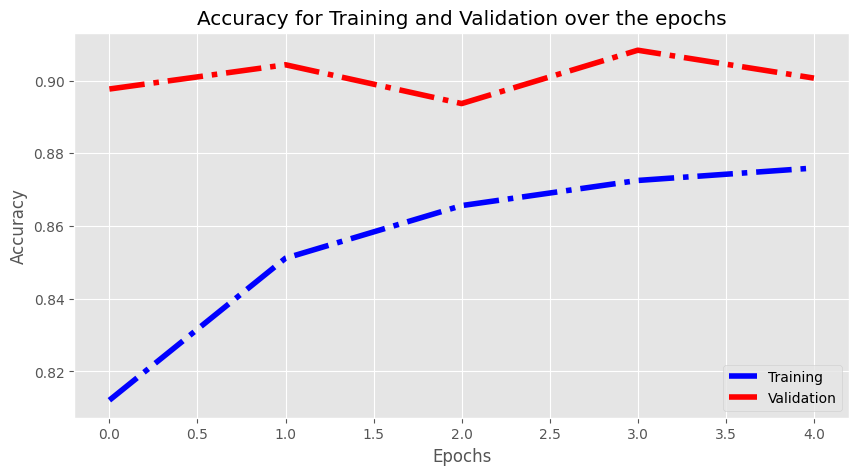

In [30]:
plt.figure(figsize=(10,5),frameon=False)
plt.plot(epochs,acc,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_acc,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Accuracy for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

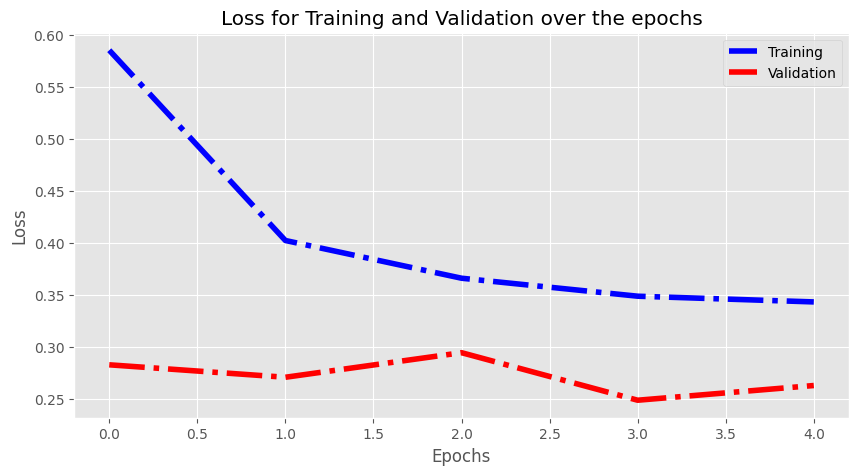

In [31]:
plt.figure(figsize=(10,5))
plt.plot(epochs,loss,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_loss,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Loss for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Using 'mixed8' as last layer

In [32]:
last_layer = pre_trained_model.get_layer('mixed8')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 1280)


In [33]:
x = layers.Flatten()(last_output)

x = layers.Dropout(0.4)(x)      

x = layers.Dense(256, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense(6, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [34]:
history1 = model.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)

C:\Users\User\AppData\Local\Temp\ipykernel_17700\3902840948.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(train_generator,


439/439 [==============================] - 298s 667ms/step - loss: 0.5649 - acc: 0.7994 - val_loss: 0.3145 - val_acc: 0.8807


In [35]:
history_inception.model.save('Final Model.h5')

In [36]:
import cv2

model_pred = tf.keras.models.load_model('Final Model.h5')

In [37]:
model_pred.compile(loss='categorical_crossentropy',
             optimizer='adam',
                metrics=['accuracy'])

class_names = ['Building','Forest','Galcier','Mountain','Sea','Street']

In [38]:
def image_prediction(filename):
    img = cv2.imread(filename)
    imgPlot = img
    plt.imshow(imgPlot[...,::-1])
    plt.axis('off')
    img = cv2.resize(img,(150,150))
    img = np.reshape(img,[1,150,150,3])
    img = img.astype('float64')
    img = img / 255.0
    pred = model_pred.predict(img)
    name = class_names[np.argmax(pred)]
    plt.title('This is predicted as ' + name,size=20)

1/1 [==============================] - 2s 2s/step


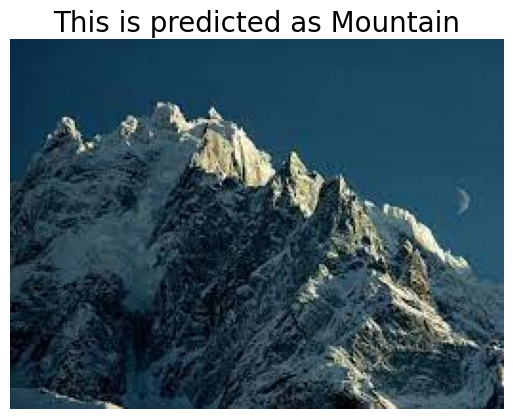

In [39]:
image_prediction(r"C:\Users\User\Downloads\mountain.jpg")

1/1 [==============================] - 0s 49ms/step


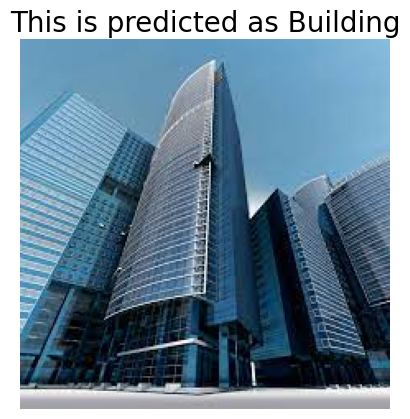

In [40]:
image_prediction(r"C:\Users\User\Downloads\building.jpg")

1/1 [==============================] - 0s 35ms/step


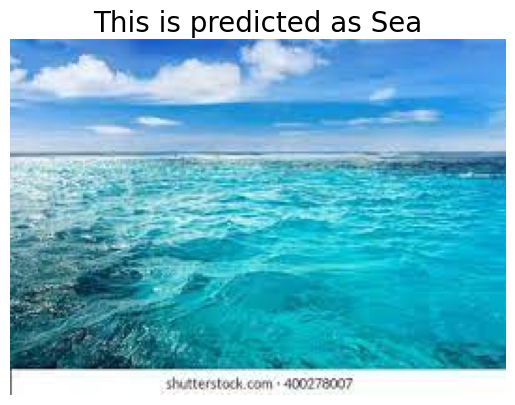

In [41]:
image_prediction(r"C:\Users\User\Downloads\sea.jpg")

1/1 [==============================] - 0s 52ms/step


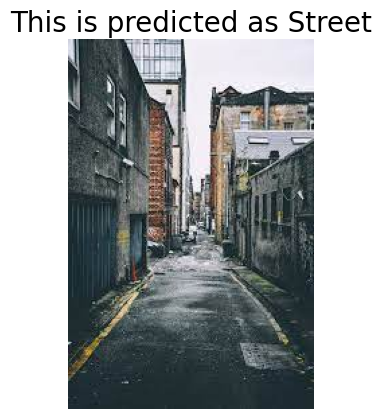

In [42]:
image_prediction(r"C:\Users\User\Downloads\street.jpg")

The model is predicting correctly!